# Create and display a mesh with polygon and polyhedron elements {#create_polygons_and_polyhedrons}

This example shows how to manually create a
`MeshedRegion <ansys.dpf.meshed_region.MeshedRegion>`{.interpreted-text
role="class"} object with polygons and polyhedrons.

::: note
::: title
Note
:::

Because the cell_faces connectivity and the faces_nodes connectivity
give all the information concerning the mesh we decide to avoid the
process of adding element by defining directly the PropertyField.

In order to plot the mesh, we add at the end of this example the
cell_node connectivity
:::


In [1]:
# First import the required modules

from ansys.dpf import core as dpf
from ansys.dpf.core import mesh_scoping_factory
from ansys.dpf.core.plotter import DpfPlotter

# Define manually the node coordinates of the polyhedrons and polygons

Note on these two sets of nodes, there are two nodes at \[0,0,0\] This
anomaly has been taking into account for this example


In [2]:
# Node coordinates of the polygons

polygon_points = [
    [9.99999978e-03, 8.74136522e-20, 0.00000000e00],  # 0
    [0.00000000e00, -3.30139302e-19, 9.99999978e-03],  # 1
    [0.00525, 0.005, 0.00525],  # 2
    [9.99999978e-03, -3.14418395e-20, 9.99999978e-03],  # 3
    [0.00000000e00, 1.03134572e-19, -9.99999978e-03],  # 4
    [0.00525, 0.005, -0.00475],  # 5
    [9.99999978e-03, 2.06269144e-19, -9.99999978e-03],  # 6
    [-9.99999978e-03, -3.14418382e-19, 0.00000000e00],  # 7
    [-0.00475, 0.005, -0.00475],  # 8
    [-9.99999978e-03, 4.50853098e-34, -9.99999978e-03],  # 9
    [-0.00475, 0.005, 0.00525],  # 10
    [-9.99999978e-03, -6.28836764e-19, 9.99999978e-03],  # 11
    [0.0005, 0.01, 0.0005],  # 12
    [-7.24078460e-03, 2.62782397e-03, 8.26236179e-20],  # 13
    [-7.10436800e-20, 2.37844935e-03, 7.74047290e-03],  # 14
    [8.67361738e-19, 2.62782397e-03, -7.24078460e-03],  # 15
    [0.00774047, 0.00237845, 0],  # 16
    [-9.39159748e-36, -1.57209197e-20, 1.73472348e-18],  # 17
]

# Node coordinate of the polyhedrons

polyhedron_points = [
    [9.99999978e-03, 8.74136522e-20, 0.00000000e00],  # 0
    [0.00000000e00, -3.30139302e-19, 9.99999978e-03],  # 1
    [0.00525, 0.005, 0.00525],  # 2
    [9.99999978e-03, -3.14418395e-20, 9.99999978e-03],  # 3
    [0.00000000e00, 1.03134572e-19, -9.99999978e-03],  # 4
    [0.00525, 0.005, -0.00475],  # 5
    [9.99999978e-03, 2.06269144e-19, -9.99999978e-03],  # 6
    [-9.99999978e-03, -3.14418382e-19, 0.00000000e00],  # 7
    [-0.00475, 0.005, -0.00475],  # 8
    [-9.99999978e-03, 4.50853098e-34, -9.99999978e-03],  # 9
    [-0.00475, 0.005, 0.00525],  # 10
    [-9.99999978e-03, -6.28836764e-19, 9.99999978e-03],  # 11
    [0.0005, 0.01, 0.0005],  # 12
    [-7.24078460e-03, 2.62782397e-03, 8.26236179e-20],  # 13
    [-7.10436800e-20, 2.37844935e-03, 7.74047290e-03],  # 14
    [8.67361738e-19, 2.62782397e-03, -7.24078460e-03],  # 15
    [0.00774047, 0.00237845, 0],  # 16
    [-9.39159748e-36, -1.57209197e-20, 1.73472348e-18],  # 17
    [-0.00072653, 0.00052606, 0.00077884],  # 18
]

We then use these coordinates to build meshed region One meshed region
will define shell elements and their connectivity (nodes -\> lines -\>
surfaces), while the second will define solid elements and their own
connectivity (nodes -\> surfaces -\> volumes).


Create a bare mesh with pre-reserved memory


In [3]:
mesh_shell_only = dpf.MeshedRegion(num_nodes=len(polygon_points), num_elements=16)
mesh_solid_only = dpf.MeshedRegion(num_nodes=len(polyhedron_points), num_elements=5)

Add the nodes to the meshed regions


In [4]:
# ShellOnly

for i, node_shell in enumerate(mesh_shell_only.nodes.add_nodes(num=len(polygon_points))):
    node_shell.id = i + 1
    node_shell.coordinates = polygon_points[i]

# SolidOnly

for i, node_solid in enumerate(mesh_solid_only.nodes.add_nodes(num=len(polyhedron_points))):
    node_solid.id = i + 1
    node_solid.coordinates = polyhedron_points[i]

# Create the connectivity tables


face-to-node connectivity


In [5]:
# ShellOnly Line[nodes]

polygon_faces_node_connectivity = [
    [2, 16],  # Line[Node] 0
    [16, 0],  # Line[Node] 1
    [0, 3],  # Line[Node] 2
    [3, 2],  # Line[Node] 3
    [3, 1],  # Line[Node] 4
    [1, 14],  # Line[Node] 5
    [14, 2],  # Line[Node] 6
    [11, 1],  # Line[Node] 7
    [1, 17],  # Line[Node] 8
    [17, 7],  # Line[Node] 9
    [7, 11],  # Line[Node] 10
    [6, 0],  # Line[Node] 11
    [16, 5],  # Line[Node] 12
    [5, 6],  # Line[Node] 13
    [5, 15],  # Line[Node] 14
    [15, 4],  # Line[Node] 15
    [4, 6],  # Line[Node] 16
    [0, 17],  # Line[Node] 17
    [9, 4],  # Line[Node] 18
    [15, 8],  # Line[Node] 19
    [8, 9],  # Line[Node] 20
    [8, 13],  # Line[Node] 21
    [13, 7],  # Line[Node] 22
    [7, 9],  # Line[Node] 23
    [17, 4],  # Line[Node] 24
    [10, 14],  # Line[Node] 25
    [11, 10],  # Line[Node] 26
    [13, 10],  # Line[Node] 27
    [12, 2],  # Line[Node] 28
    [10, 12],  # Line[Node] 29
    [8, 12],  # Line[Node] 30
    [5, 12],  # Line[Node] 31
]

# SolidOnly Face[nodes]

polyhedron_faces_node_connectivity = [
    [15, 17, 18, 13, 8],  # Face[Node] 0
    [17, 18, 13, 7],  # Face[Node] 1
    [17, 18, 14, 1],  # Face[Node] 2
    [16, 17, 18, 14, 2],  # Face[Node] 3
    [17, 16, 0],  # Face[Node] 4
    [17, 15, 4],  # Face[Node] 5
    [16, 17, 15, 5],  # Face[Node] 6
    [14, 18, 13, 10],  # Face[Node] 7
    [2, 16, 0, 3],  # Face[Node] 8
    [3, 1, 14, 2],  # Face[Node] 9
    [11, 1, 17, 7],  # Face[Node] 10
    [6, 0, 16, 5],  # Face[Node] 11
    [5, 15, 4, 6],  # Face[Node] 12
    [3, 0, 17, 1],  # Face[Node] 13
    [9, 4, 15, 8],  # Face[Node] 14
    [8, 13, 7, 9],  # Face[Node] 15
    [7, 17, 4, 9],  # Face[Node] 16
    [10, 14, 1, 11],  # Face[Node] 17
    [11, 7, 13, 10],  # Face[Node] 18
    [4, 17, 0, 6],  # Face[Node] 19
    [12, 2, 14, 10],  # Face[Node] 20
    [10, 13, 8, 12],  # Face[Node] 21
    [8, 15, 5, 12],  # Face[Node] 22
    [5, 16, 2, 12],  # Face[Node] 23
]

cell-to-face connectivity


In [6]:
# ShellOnly Face[lines]

polygon_element_faces_connectivity = [
    [0, 1, 2, 3],  # Face[Line] 0
    [4, 5, 6, 3],  # Face[Line] 1
    [7, 8, 9, 10],  # Face[Line] 2
    [11, 1, 12, 13],  # Face[Line] 3
    [14, 15, 16, 13],  # Face[Line] 4
    [2, 17, 8, 4],  # Face[Line] 5
    [18, 15, 19, 20],  # Face[Line] 6
    [21, 22, 23, 20],  # Face[Line] 7
    [10, 24, 18, 23],  # Face[Line] 8
    [25, 5, 7, 26],  # Face[Line] 9
    [10, 22, 27, 26],  # Face[Line] 10
    [24, 21, 12, 18],  # Face[Line] 11
    [28, 6, 25, 29],  # Face[Line] 12
    [27, 21, 30, 29],  # Face[Line] 13
    [19, 14, 31, 30],  # Face[Line] 14
    [12, 0, 28, 31],  # Face[Line] 15
]

# SolidOnly Volume[Face]

polyhedron_element_faces_connectivity = [
    [3, 7, 20, 21, 22, 23, 0, 6],  # Volume[Face] 0
    [2, 8, 9, 13, 3, 4],  # Volume[Face] 1
    [0, 5, 14, 15, 16, 1],  # Volume[Face] 2
    [4, 6, 11, 12, 19, 5],  # Volume[Face] 3
    [1, 10, 17, 18, 2, 7],  # Volume[Face] 4
]

Now also have to define a PropertyField relative the element_face
reverse. It is necessary to define the orientation of the faces relative
to the cells that they surround. A given face has its nodal connectivity
defined in a certain order, which means that the two cells that it
bounds are either at the positive or negative sides of the face. We
indicate this with the elements_faces_reversed PropertyField, \# whose
values can be either 0 or 1. By convention, 0 means that the face-\>node
connectivity implies that the given cell is at side 0 of the face, and 1
the opposite


element_face reverse connectivity


In [7]:
# ShellOnly

data_reverse_field_shell = [
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 0, 0],
    [0, 1, 1, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 1],
    [0, 1, 1, 0],
    [1, 1, 0, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 1],
]

# SolidOnly

data_reverse_field_solid = [
    [0, 0, 0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 1],
]

# Connectivity set in property fields

We now set all of these information into a PropertyField regarding the
meshed region


face_node connectivity


In [8]:
# ShellOnly

connectivity_f_n_shell = dpf.PropertyField()
for face_nodes_index_shell, face_nodes_shell in enumerate(polygon_faces_node_connectivity):
    connectivity_f_n_shell.append(face_nodes_shell, face_nodes_index_shell)
connectivity_f_n_shell.scoping = mesh_scoping_factory.face_scoping(list(range(30)))
mesh_shell_only.set_property_field(
    property_name="faces_nodes_connectivity", value=connectivity_f_n_shell
)

# SolidOnly

connectivity_f_n_solid = dpf.PropertyField()
for face_nodes_index_solid, face_nodes_solid in enumerate(polyhedron_faces_node_connectivity):
    connectivity_f_n_solid.append(face_nodes_solid, face_nodes_index_solid)
connectivity_f_n_solid.scoping = mesh_scoping_factory.face_scoping(list(range(24)))
mesh_solid_only.set_property_field(
    property_name="faces_nodes_connectivity", value=connectivity_f_n_solid
)

element_face connectivity


In [9]:
# ShellOnly

connectivity_e_f_shell = dpf.PropertyField()
reverse_connectivity_e_f_shell = dpf.PropertyField()
for element_faces_index_shell, element_faces_shell in enumerate(polygon_element_faces_connectivity):
    connectivity_e_f_shell.append(element_faces_shell, element_faces_index_shell)
    reverse_connectivity_e_f_shell.append(
        data_reverse_field_shell[element_faces_index_shell], element_faces_index_shell
    )
mesh_shell_only.set_property_field(
    property_name="elements_faces_connectivity", value=connectivity_e_f_shell
)
mesh_shell_only.set_property_field(
    property_name="elements_faces_reversed", value=reverse_connectivity_e_f_shell
)

# SolidOnly

connectivity_e_f_solid = dpf.PropertyField()
reverse_connectivity_e_f_solid = dpf.PropertyField()
for element_faces_index_solid, element_faces_solid in enumerate(
    polyhedron_element_faces_connectivity
):
    connectivity_e_f_solid.append(element_faces_solid, element_faces_index_solid)
    reverse_connectivity_e_f_solid.append(
        data_reverse_field_solid[element_faces_index_solid], element_faces_index_solid
    )
mesh_solid_only.set_property_field(
    property_name="elements_faces_connectivity", value=connectivity_e_f_solid
)
mesh_solid_only.set_property_field(
    property_name="elements_faces_reversed", value=reverse_connectivity_e_f_solid
)

# Face/Element types set in property fields

Set the element/face type for the meshed region For the ShellOnly the
faces are lines and the elements are Quad For the SolidOnly the faces
are Polygon, Quad and Tri and the elements are Polyhedrons


face type


In [10]:
# ShellOnly

FT_shell_line = [[dpf.element_types.Line2.value] * 30]

fcs_types_shell = dpf.PropertyField()
for face_index_solid, fctype_shell in enumerate(FT_shell_line):
    fcs_types_shell.append(fctype_shell, face_index_solid)
fcs_types_shell.scoping = mesh_scoping_factory.face_scoping(list(range(30)))
mesh_shell_only.set_property_field(property_name="faces_type", value=fcs_types_shell)

# SolidOnly

FT_solid_tri = [dpf.element_types.Tri3.value]
FT_solid_quad = [dpf.element_types.Quad4.value]
FT_solid_polyg = [dpf.element_types.Polygon.value]

FT_tot = [
    FT_solid_polyg + FT_solid_quad * 2 + FT_solid_polyg + FT_solid_tri * 2 + FT_solid_quad * 18
]

fcs_types_solid = dpf.PropertyField()
for face_index_shell, fctype_solid in enumerate(FT_tot):
    fcs_types_solid.append(fctype_solid, face_index_shell)
fcs_types_solid.scoping = mesh_scoping_factory.face_scoping(list(range(24)))
mesh_solid_only.set_property_field(property_name="faces_type", value=fcs_types_solid)

element type


In [11]:
# ShellOnly

ET_shell_quad = [[dpf.element_types.Quad4.value] * 16]

els_types_shell = dpf.PropertyField()
for element_index_solid, eltype_shell in enumerate(ET_shell_quad):
    els_types_shell.append(eltype_shell, element_index_solid)
els_types_shell.scoping = mesh_scoping_factory.elemental_scoping(list(range(16)))
mesh_shell_only.set_property_field(property_name="eltype", value=els_types_shell)

# SolidOnly

ET_solid_polyhedron = [dpf.element_types.Polyhedron.value] * 5

els_types_solid = dpf.PropertyField()
for element_index_shell, eltype_solid in enumerate(ET_solid_polyhedron):
    els_types_solid.append(eltype_solid, element_index_shell)
els_types_solid.scoping = mesh_scoping_factory.elemental_scoping(list(range(5)))
mesh_solid_only.set_property_field(property_name="eltype", value=els_types_solid)

# Plot the meshes

In order to plot the meshes, we have to set a cell_node connectivity
PropertyField


cell_node connectivity


In [12]:
# ShellOnly

polygon_element_node_connectivity = [
    [2, 16, 0, 3],  # Face[Node] 0
    [3, 1, 14, 2],  # Face[Node] 1
    [11, 1, 17, 7],  # Face[Node] 2
    [6, 0, 16, 5],  # Face[Node] 3
    [5, 15, 4, 6],  # Face[Node] 4
    [3, 0, 17, 1],  # Face[Node] 5
    [9, 4, 15, 8],  # Face[Node] 6
    [8, 13, 7, 9],  # Face[Node] 7
    [7, 17, 4, 9],  # Face[Node] 8
    [10, 14, 1, 11],  # Face[Node] 9
    [11, 7, 13, 10],  # Face[Node] 10
    [4, 17, 0, 6],  # Face[Node] 11
    [12, 2, 14, 10],  # Face[Node] 12
    [10, 13, 8, 12],  # Face[Node] 13
    [8, 15, 5, 12],  # Face[Node] 14
    [5, 16, 2, 12],  # Face[Node] 15
]

# SolidOnly

polyhedron_element_node_connectivity = [
    [2, 5, 8, 10, 12, 13, 14, 15, 16, 17, 18],  # Volume[Node] 0
    [0, 1, 2, 3, 14, 16, 17, 18],  # Volume[Node] 1
    [4, 7, 8, 9, 13, 15, 17, 18],  # Volume[Node] 2
    [0, 4, 5, 6, 15, 16, 17],  # Volume[Node] 3
    [1, 7, 10, 11, 13, 14, 17, 18],  # Volume[Node] 4
]

Set the cell_node connectivity in PropertyField


In [13]:
# ShellOnly

connectivity_e_n_shell = dpf.PropertyField()
for element_nodes_index_shell, element_nodes_shell in enumerate(polygon_element_node_connectivity):
    connectivity_e_n_shell.append(element_nodes_shell, element_nodes_index_shell)
mesh_shell_only.set_property_field(property_name="connectivity", value=connectivity_e_n_shell)

# SolidOnly

connectivity_e_n_solid = dpf.PropertyField()
for element_nodes_index_solid, element_nodes_solid in enumerate(
    polyhedron_element_node_connectivity
):
    connectivity_e_n_solid.append(element_nodes_solid, element_nodes_index_solid)
mesh_solid_only.set_property_field(property_name="connectivity", value=connectivity_e_n_solid)

Plot


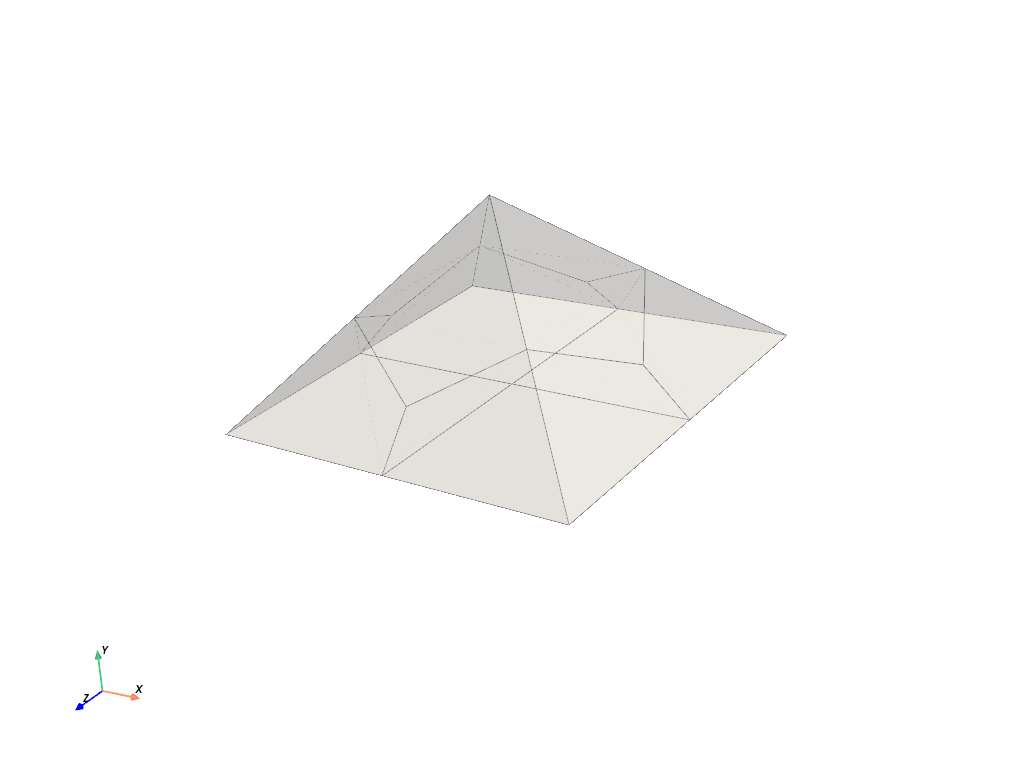

[(0.04, 0.03, 0.05),
 (0.0, 0.0, 0.0),
 (0.408248290463863, 0.816496580927726, 0.408248290463863)]

In [14]:
c_pos = [(0.04, 0.03, 0.05), (0.0, 0.0, 0.0), (0.1, 0.2, 0.1)]

pl = DpfPlotter()
pl.add_mesh(
    mesh_solid_only, style="surface", show_edges=True, show_axes=True, color="w", opacity=0.3
)
pl.show_figure(show_axes=True, cpos=c_pos, return_cpos=True)